# Sample Usages of granular functions


In [7]:
def type_processor(c_data):
    def generate_clinical_type(row):
        ER = row['ER Status']
        HER2 = row['HER2 Status']
        if ER == "Positive" and HER2 == "Positive":
            return "HR+HER2+"
        if ER == "Negative" and HER2 == "Positive":
            return "HR-HER2+"
        if ER == "Positive" and HER2 == "Negative":
            return "HR+HER2-"
        if ER == "Negative" and HER2 == "Negative":
            return "TripleNeg"
        # Check if HER2 is nan
        if HER2 != "Positive" and HER2 != "Negative":
            return "HER2-NAN"
    

    c_data['clinical_type'] = c_data.apply(generate_clinical_type, axis=1)
    return c_data

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def visualize_clinical_data(c_data, s_c_data, clinical_type_column_name = "clinical_type"):
    c_data.columns = c_data.columns.str.strip()

    # Print columns
    print("Clinical data columns: ", c_data.columns)
    print("Single cell data columns: ", s_c_data.columns)

    # Keep rows in c_data with PIDs in single_cell_data
    c_data = c_data[c_data["Patient ID"].isin(s_c_data["metabricId"])]

    def generate_clinical_type(row):
        ER = row['ER Status']
        HER2 = row['HER2 Status']
        if ER == "Positive" and HER2 == "Positive":
            return "HR+HER2+"
        if ER == "Negative" and HER2 == "Positive":
            return "HR-HER2+"
        if ER == "Positive" and HER2 == "Negative":
            return "HR+HER2-"
        if ER == "Negative" and HER2 == "Negative":
            return "TripleNeg"
        # Check if HER2 is nan
        if HER2 != "Positive" and HER2 != "Negative":
            return "HER2-NAN"
    
    # If clinical_type column does not exist, generate it
    if clinical_type_column_name not in c_data.columns:
        c_data = type_processor(c_data)

    # Define custom order for the plot
    custom_order = ["TripleNeg", "HR-HER2+", "HR+HER2-", "HR+HER2+", "HER2-NAN"]

    # Clinical_type vs Survival candle plot using sns and order the clinical_type
    clinical_type = c_data["clinical_type"]
    survival = c_data["Overall Survival (Months)"]
    ax = sns.boxplot(x=clinical_type, y=survival, order=custom_order)
    ax.set(xlabel="Clinical Type", ylabel="Overall Survival (Months)")
    plt.show()

    clinical_type = c_data["clinical_type"]
    age = c_data["Age at Diagnosis"]
    ax = sns.boxplot(x=clinical_type, y=age, order=custom_order)
    ax.set(xlabel="Clinical Type", ylabel="Age at Diagnosis")
    plt.show()

    
    # Age vs Survival scatter plot,

    
    ax = sns.scatterplot(x=age, y=survival, hue=clinical_type, hue_order=custom_order)
    ax.set(xlabel="Age at Diagnosis", ylabel="Overall Survival (Months)")
    plt.show()

    
    # HER2-NAN count
    print("HER2-NAN count: ", len(c_data[c_data["clinical_type"] == "HER2-NAN"]))
    # Total count   
    print("Total count: ", len(c_data))

Clinical data columns:  Index(['Study ID', 'Patient ID', 'Sample ID', 'Age at Diagnosis',
       'Type of Breast Surgery', 'Cancer Type', 'Cancer Type Detailed',
       'Cellularity', 'Chemotherapy', 'Pam50 + Claudin-low subtype', 'Cohort',
       'ER status measured by IHC', 'ER Status', 'Neoplasm Histologic Grade',
       'HER2 status measured by SNP6', 'HER2 Status',
       'Tumor Other Histologic Subtype', 'Hormone Therapy',
       'Inferred Menopausal State', 'Integrative Cluster',
       'Primary Tumor Laterality', 'Lymph nodes examined positive',
       'Mutation Count', 'Nottingham prognostic index', 'Oncotree Code',
       'Overall Survival (Months)', 'Overall Survival Status', 'PR Status',
       'Radio Therapy', 'Relapse Free Status (Months)', 'Relapse Free Status',
       'Number of Samples Per Patient', 'Sample Type', 'Sex',
       '3-Gene classifier subtype', 'TMB (nonsynonymous)', 'Tumor Size',
       'Tumor Stage', 'Patient's Vital Status'],
      dtype='object')
Single

/var/folders/k2/mmnsl0v1443297g72q3p30cw0000gn/T/ipykernel_49614/3209693382.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_data['clinical_type'] = c_data.apply(generate_clinical_type, axis=1)


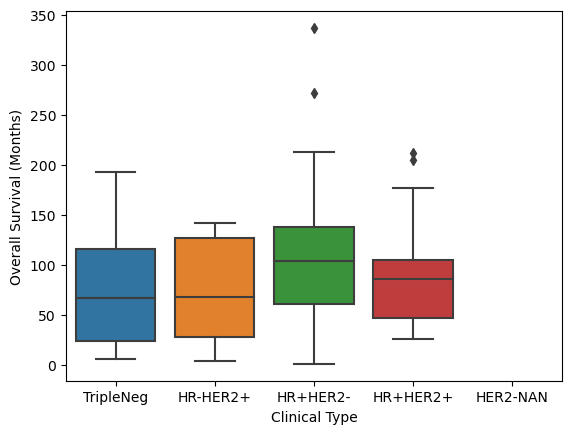

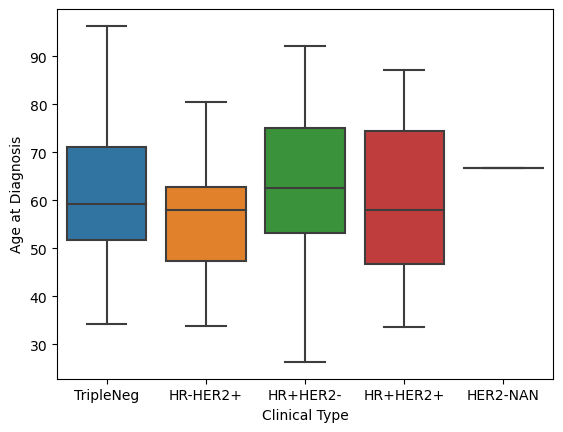

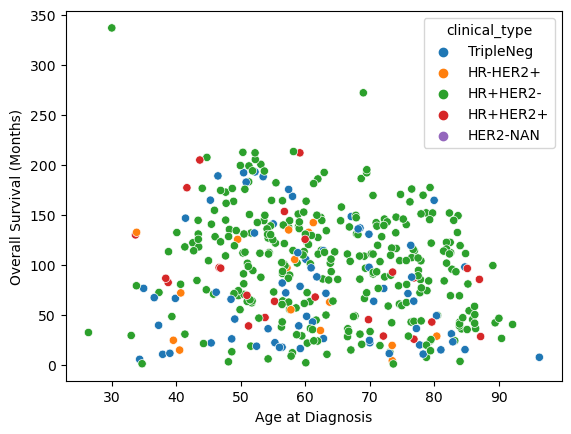

HER2-NAN count:  1
Total count:  405


In [9]:

import pandas as pd


c_data  = pd.read_csv("../data/METABRIC/brca_metabric_clinical_data.tsv", sep="\t", index_col=False)
s_c_data = pd.read_csv("../data/METABRIC/single_cell_data.csv", index_col=False)

visualize_clinical_data(c_data=c_data, s_c_data=s_c_data)

In [11]:


def p_correlations(data, dim1, dim2, division_dim):
    # Calculate pearson correlation

    print("Pearson correlation between age and survival: ", data[dim2].corr(data[dim1]))

    
    # Calculate pearson correlation for each division
    for div in data[division_dim].unique():
        print("Pearson correlation between age and survival for division: ", div, data[data[division_dim] == div][dim2].corr(data[data[division_dim] == div][dim1]))

c_data = type_processor(c_data)

p_correlations(c_data, "Age at Diagnosis" ,"Overall Survival (Months)","clinical_type")

Pearson correlation between age and survival:  -0.14580270734858267
Pearson correlation between age and survival for division:  HR+HER2- -0.23957544559987162
Pearson correlation between age and survival for division:  TripleNeg -0.13298294976962086
Pearson correlation between age and survival for division:  HER2-NAN nan
Pearson correlation between age and survival for division:  HR+HER2+ -0.18453241139541662
Pearson correlation between age and survival for division:  HR-HER2+ 0.05052357033842827


/opt/homebrew/Caskroom/miniconda/base/envs/COPred/lib/python3.9/site-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/homebrew/Caskroom/miniconda/base/envs/COPred/lib/python3.9/site-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


In [ ]:
# Create new conda environment
conda create -n sample_usage python=3.7

In [ ]:
import plotting
import pandas as pd

c_data  = pd.read_csv("../data/METABRIC/brca_metabric_clinical_data.tsv", sep="\t", index_col=False)
s_c_data = pd.read_csv("../data/METABRIC/single_cell_data.csv", index_col=False)

plotting.visualize_clinical_data(c_data=c_data, s_c_data=s_c_data)